In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Climate Change in Woodmere,NY
### Data Station id: USW00094789
### Station: JFK INTL AP NY
### Website : https://crt-climate-explorer.nemac.org/
### Section: New York City, NY => Historical Weather Data


## Temprature in Woodmere,NY


In [406]:
temp = pd.read_csv('USW00094789-temperature-degreeF.csv')

In [407]:
temp.date = pd.Series([str(i) for i in temp['date']])

In [408]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28292 entries, 0 to 28291
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        28292 non-null  object 
 1   min         26689 non-null  float64
 2   max         26689 non-null  float64
 3   normal_min  28292 non-null  float64
 4   normal_max  28292 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.1+ MB


In [409]:
temp.head()

,date,min,max,normal_min,normal_max
0,19480717,64.0,74.0,69.1,84.0
1,19480718,70.0,81.0,69.2,84.0
2,19480719,70.0,85.0,69.2,84.0
3,19480720,69.0,84.0,69.2,84.0
4,19480721,71.0,85.0,69.3,84.0


In [410]:
Temp = []
s = ''
for i in temp.date:
  s += i[:4]
  s+=' '
  s+=i[4:6]
  s+=' '
  s+=i[6:]
  Temp.append(s)
  s=''

In [411]:
temp.date = pd.Series([datetime( int( i.split(' ')[0] ),int( i.split(' ')[1] ),int( i.split(' ')[2] ) ) for i in Temp])

In [412]:
temp.date.min()

Timestamp('1948-07-17 00:00:00')

In [413]:
temp.date.max()

Timestamp('2025-12-31 00:00:00')

### Temp from 17 July 1948 To 17 July 2021

In [414]:
temp_To_Aug = temp[temp['date']<datetime(2021,7,18)]

In [415]:
temp_To_Aug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 26663
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        26664 non-null  datetime64[ns]
 1   min         26630 non-null  float64       
 2   max         26630 non-null  float64       
 3   normal_min  26664 non-null  float64       
 4   normal_max  26664 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.2 MB


In [416]:
temp_To_Aug.isna().sum()

date           0
min           34
max           34
normal_min     0
normal_max     0
dtype: int64

In [417]:
temp_To_Aug[temp_To_Aug['min'].isna()]

,date,min,max,normal_min,normal_max
777,1950-09-02,NaN,NaN,65.1,79.8
778,1950-09-03,NaN,NaN,64.9,79.6
856,1950-11-20,NaN,NaN,38.5,52.2
857,1950-11-21,NaN,NaN,38.2,51.9
904,1951-01-07,NaN,NaN,27.1,40.0
905,1951-01-08,NaN,NaN,26.9,39.8
928,1951-01-31,NaN,NaN,25.5,39.4
929,1951-02-01,NaN,NaN,25.6,39.5
1207,1951-11-06,NaN,NaN,42.5,57.1
1208,1951-11-07,NaN,NaN,42.2,56.7


In [418]:
Year = []
AvgMinimum = []
AvgMax = []
SumMin = 0.0
SumMax = 0.0
DayCount = 0.0
for i in temp_To_Aug.groupby(['date']).date:
  
  if not str(temp_To_Aug['min'].loc[i[1].index[0]]) == 'nan':
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgMinimum.append(SumMin/DayCount)
        AvgMax.append(SumMax/DayCount)
      
      SumMin = 0
      SumMax = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumMin+=temp_To_Aug['min'].loc[i[1].index[0]]
    SumMax+=temp_To_Aug['max'].loc[i[1].index[0]]
    DayCount+=1
AvgMinimum.append(SumMin/DayCount)
AvgMax.append(SumMax/DayCount)

In [419]:
len(Year)

74

In [420]:
len(AvgMinimum)

74

In [421]:
len(AvgMax)

74

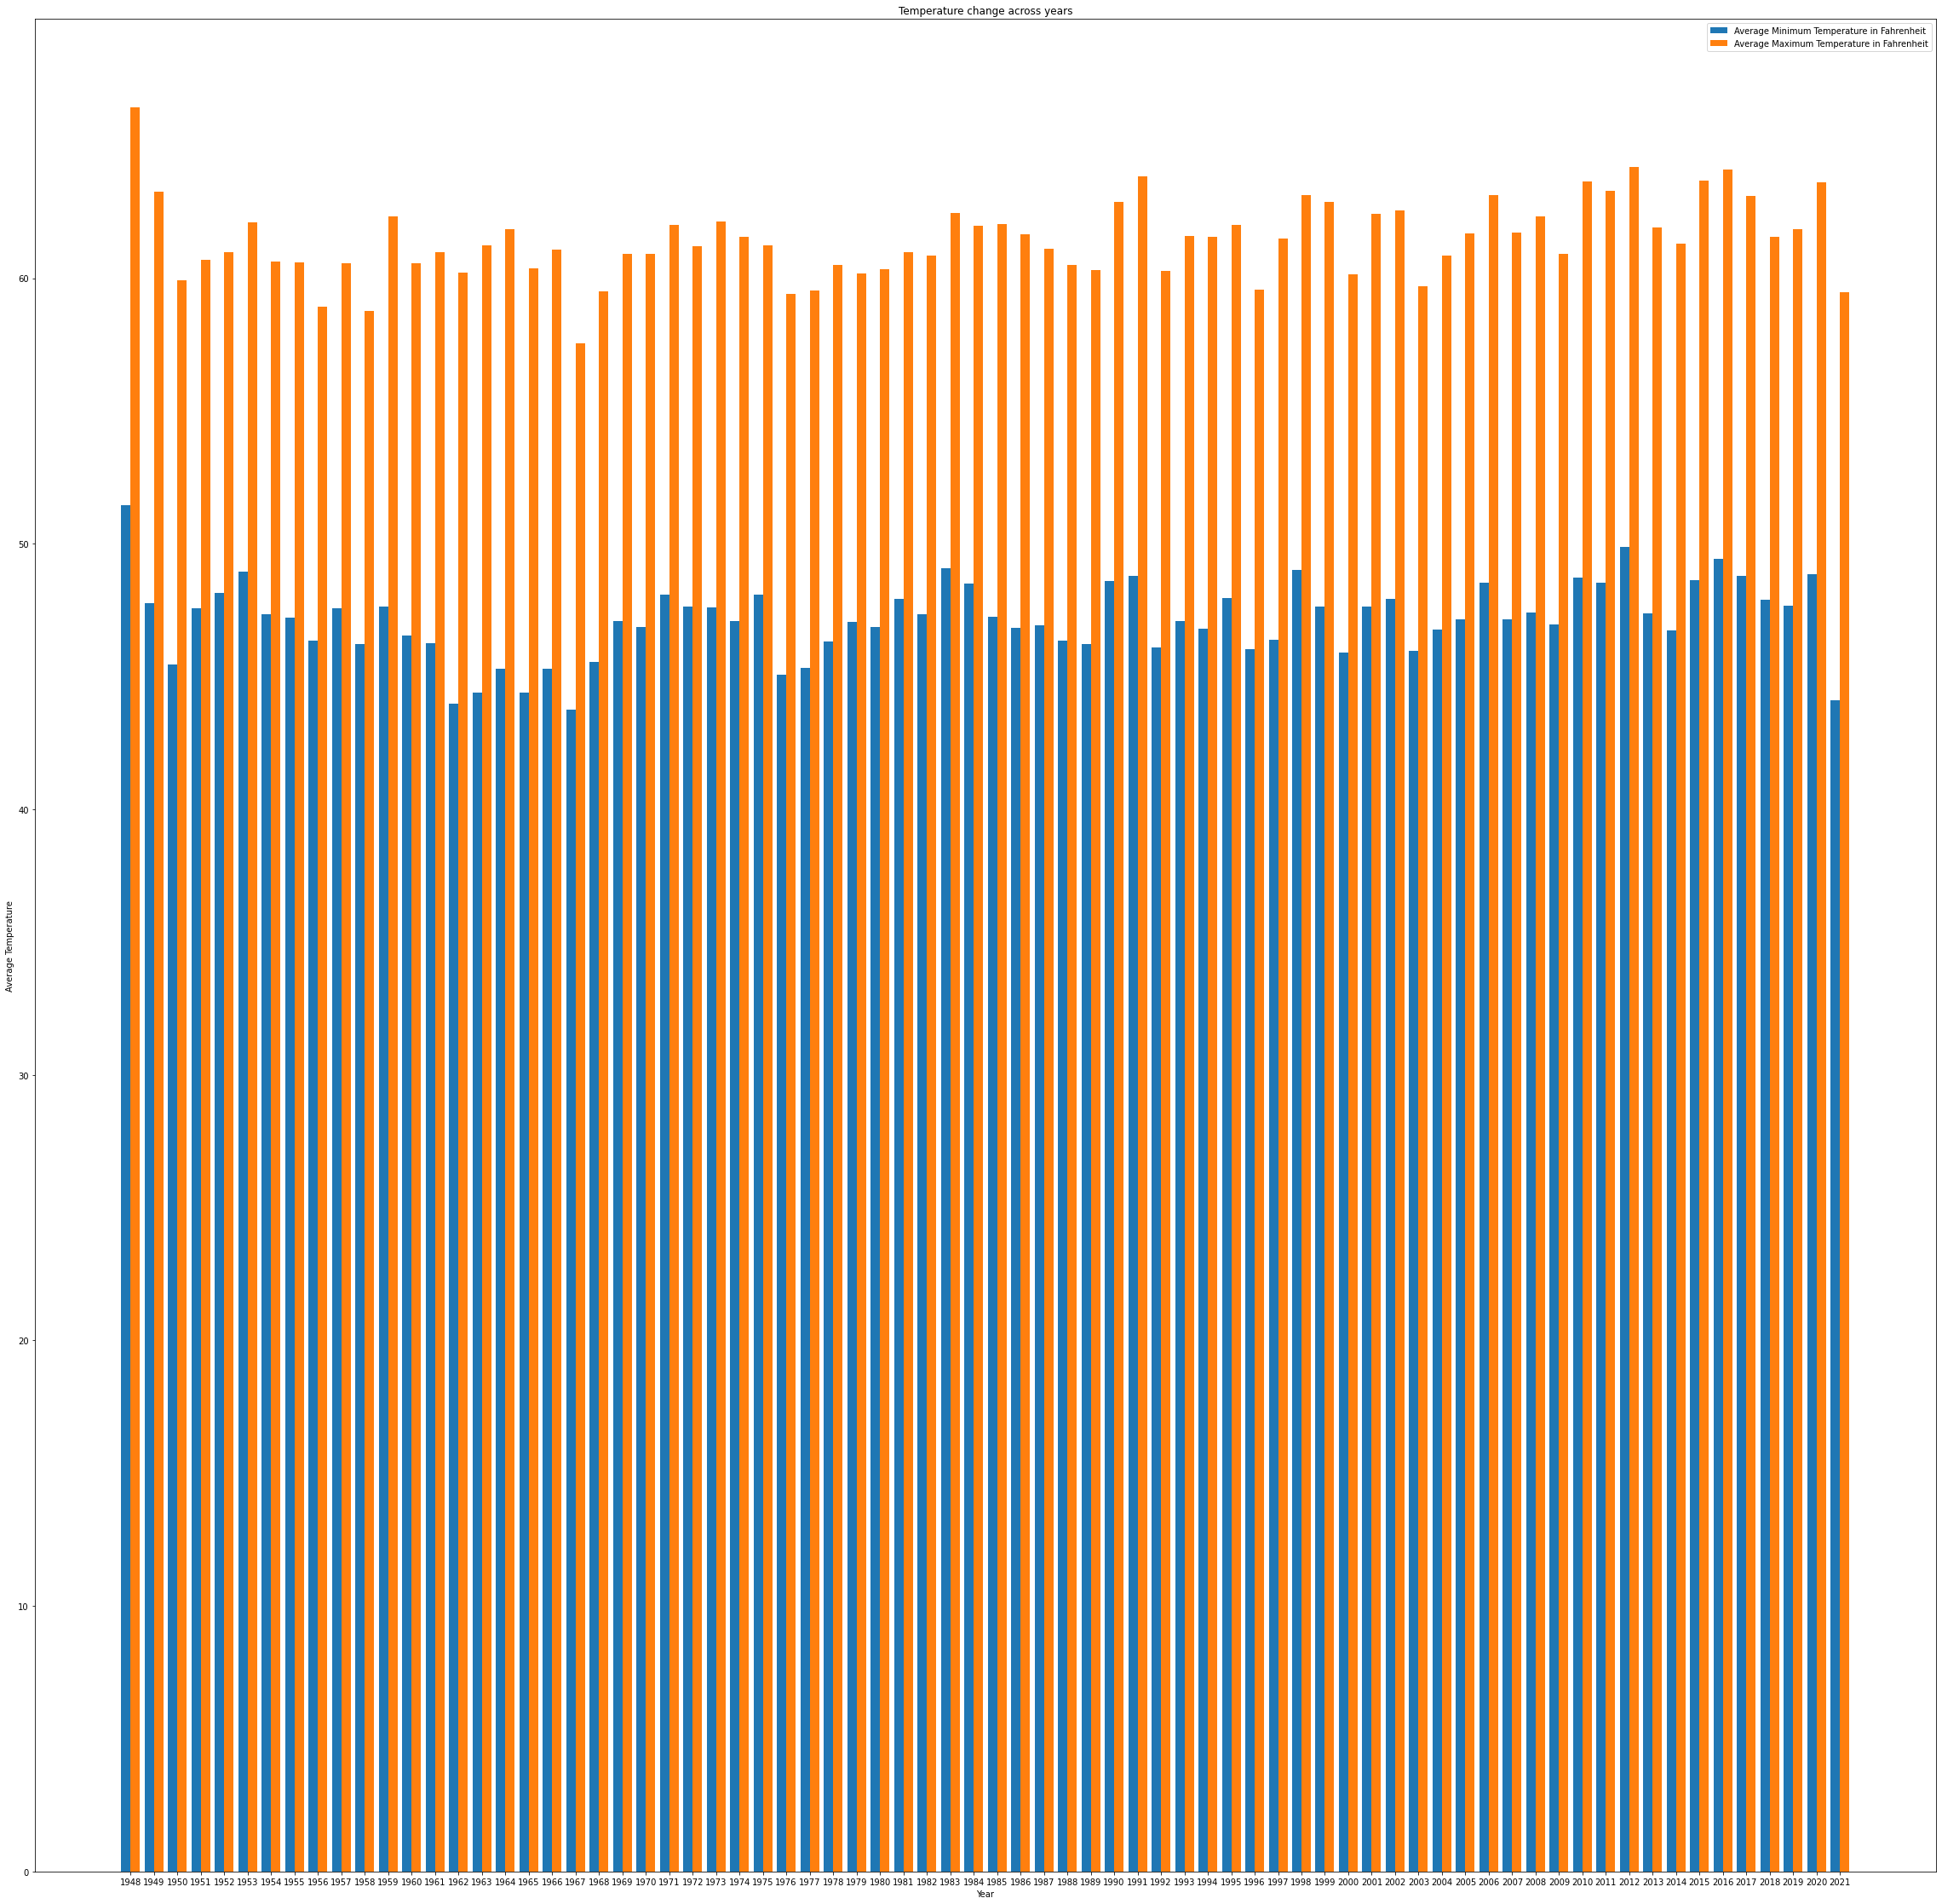

In [422]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(40,40))
plt.bar(Year_Axis-0.2,AvgMinimum,0.4,label='Average Minimum Temperature in Fahrenheit')
plt.bar(Year_Axis+0.2,AvgMax,0.4,label='Average Maximum Temperature in Fahrenheit')
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature change across years')
plt.legend()
plt.savefig('Temp_74_year.png')
plt.show()

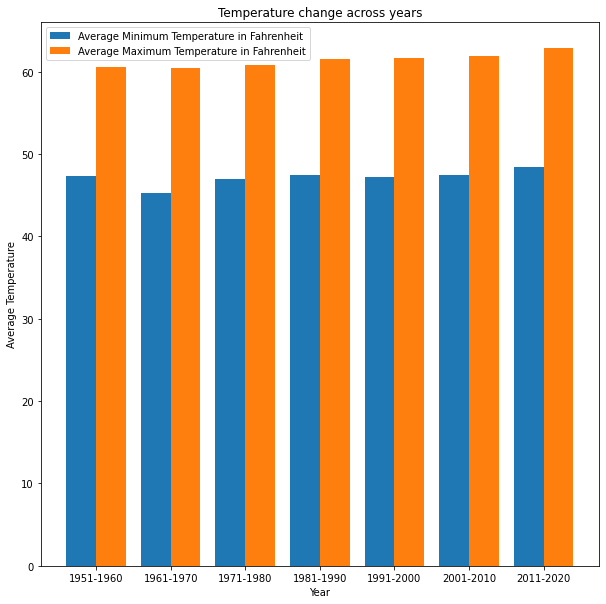

In [423]:
New_AvgMinimum = []
New_AvgMaximum = []
New_Year = ['1951-1960','1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']
YearSum = 0.0
YearCount = 0
for i in AvgMinimum[3:-1]:
  if(YearCount >= 10):
    
    New_AvgMinimum.append(YearSum/10.0)
    YearCount=0
    YearSum=0.0
    YearSum+=i
    YearCount+=1
  else:
    YearCount+=1
    YearSum+=i
New_AvgMinimum.append(YearSum/YearCount)
YearCount=0
YearSum=0.0
for i in AvgMax[3:-1]:
  if(YearCount >= 10):
    
    New_AvgMaximum.append(YearSum/10.0)
    YearCount=0
    YearSum=0.0
    YearSum+=i
    YearCount+=1
  else:
    YearCount+=1
    YearSum+=i
New_AvgMaximum.append(YearSum/YearCount)

Year_Axis = np.arange(len(New_Year))
plt.figure(figsize=(10,10))
plt.bar(Year_Axis-0.2,New_AvgMinimum,0.4,label='Average Minimum Temperature in Fahrenheit')
plt.bar(Year_Axis+0.2,New_AvgMaximum,0.4,label='Average Maximum Temperature in Fahrenheit')
plt.xticks(Year_Axis,New_Year)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature change across years')
plt.legend()
plt.savefig('Temp_74_year.png')
plt.show()

In [424]:
print('Maximum differnece betweeb decade 2011-2020 and 1951-1960:',New_AvgMaximum[-1]-New_AvgMaximum[0])
print('Minimum differnece betweeb decade 2011-2020 and 1951-1960:',New_AvgMinimum[-1]-New_AvgMinimum[0])

Maximum differnece betweeb decade 2011-2020 and 1951-1960: 2.240200641918456
Minimum differnece betweeb decade 2011-2020 and 1951-1960: 1.0212652006114311


Text(0.5, 1.0, 'Average Minimum Temprature Across years')

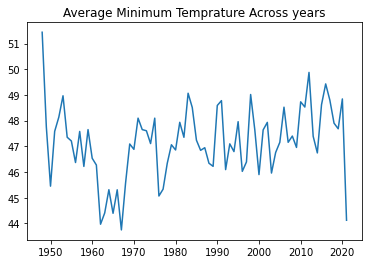

In [425]:
pd.Series(AvgMinimum,index=Year).plot()
plt.title('Average Minimum Temprature Across years')

Text(0.5, 1.0, 'Average Maximum Temprature Across years')

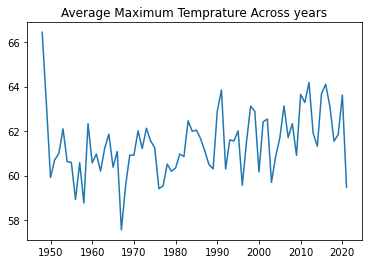

In [426]:
pd.Series(AvgMax,index=Year).plot()
plt.title('Average Maximum Temprature Across years')

In [427]:
Year = []
AvgMinimum = []
AvgMax = []
SumMin = 0.0
SumMax = 0.0
DayCount = 0.0
for i in temp_To_Aug.groupby(['date']).date:
  
  if not str(temp_To_Aug['normal_min'].loc[i[1].index[0]]) == 'nan':
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgMinimum.append(SumMin/DayCount)
        AvgMax.append(SumMax/DayCount)
      
      SumMin = 0
      SumMax = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumMin+=temp_To_Aug['normal_min'].loc[i[1].index[0]]
    SumMax+=temp_To_Aug['normal_max'].loc[i[1].index[0]]
    DayCount+=1
AvgMinimum.append(SumMin/DayCount)
AvgMax.append(SumMax/DayCount)

Text(0.5, 1.0, 'Average Normal Minimum Temprature Across years')

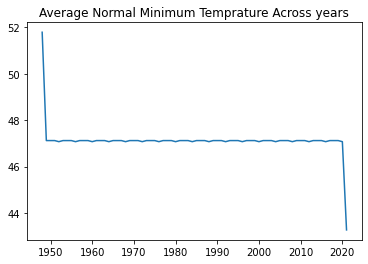

In [428]:
pd.Series(AvgMinimum,index=Year).plot()
plt.title('Average Normal Minimum Temprature Across years')

Text(0.5, 1.0, 'Average Normal Maximum Temprature Across years')

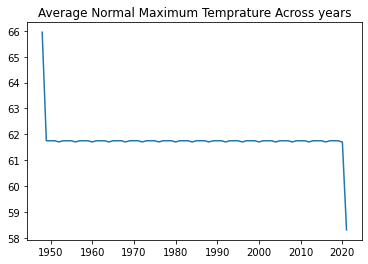

In [429]:
pd.Series(AvgMax,index=Year).plot()
plt.title('Average Normal Maximum Temprature Across years')

## Precipitation

In [430]:
Per = pd.read_csv('USW00094789-JFK_INTL_AP-precipitation-inch.csv')

In [431]:
Per.date = pd.Series([str(i) for i in Per['date']])

In [432]:
Per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28292 entries, 0 to 28291
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  28292 non-null  object 
 1   precipitation         26553 non-null  object 
 2   precipitation_normal  28292 non-null  float64
dtypes: float64(1), object(2)
memory usage: 663.2+ KB


In [433]:
Per.isna().sum()

date                       0
precipitation           1739
precipitation_normal       0
dtype: int64

In [434]:
Per.duplicated().sum()

0

In [435]:
Per[Per['precipitation'] == 'T']

,date,precipitation,precipitation_normal
533,19500101,T,0.10
534,19500102,T,0.21
4916,19620101,T,0.10
5282,19630102,T,0.21
5283,19630103,T,0.31
5284,19630104,T,0.43
5285,19630105,T,0.54
5286,19630106,T,0.65
5287,19630107,T,0.76
5288,19630108,T,0.86


In [436]:
Per[Per['precipitation'].isna()]

,date,precipitation,precipitation_normal
1264,19520102,NaN,0.21
1265,19520103,NaN,0.31
1266,19520104,NaN,0.43
1267,19520105,NaN,0.54
1268,19520106,NaN,0.65
...,...,...,...
28287,20251227,NaN,42.84
28288,20251228,NaN,42.95
28289,20251229,NaN,43.07
28290,20251230,NaN,43.18


In [437]:
Per.head()

,date,precipitation,precipitation_normal
0,19480717,0.06,22.99
1,19480718,0.06,23.13
2,19480719,0.06,23.26
3,19480720,0.06,23.40
4,19480721,2.51,23.52


In [438]:
Temp = []
s = ''
for i in Per.date:
  s += i[:4]
  s+=' '
  s+=i[4:6]
  s+=' '
  s+=i[6:]
  Temp.append(s)
  s=''

In [439]:
Per.date = pd.Series([datetime( int( i.split(' ')[0] ),int( i.split(' ')[1] ),int( i.split(' ')[2] ) ) for i in Temp])

In [440]:
Per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28292 entries, 0 to 28291
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  28292 non-null  datetime64[ns]
 1   precipitation         26553 non-null  object        
 2   precipitation_normal  28292 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 663.2+ KB


In [441]:
Per.date.min()

Timestamp('1948-07-17 00:00:00')

In [442]:
Per.date.max()

Timestamp('2025-12-31 00:00:00')

### Precipitation from 17 July 1948 To 17 July 2021

In [443]:
Per_To_Aug = Per[Per['date']<datetime(2021,7,18)]

In [444]:
Per_To_Aug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 26663
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  26664 non-null  datetime64[ns]
 1   precipitation         26494 non-null  object        
 2   precipitation_normal  26664 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 833.2+ KB


In [445]:
Per_To_Aug.isna().sum()

date                      0
precipitation           170
precipitation_normal      0
dtype: int64

In [446]:
Year = []
AvgPer = []
SumPer = 0.0
DayCount = 0.0
for i in Per_To_Aug.groupby(['date']).date:
  
  if not (str(Per_To_Aug['precipitation'].loc[i[1].index[0]]) == 'nan' or str(Per_To_Aug['precipitation'].loc[i[1].index[0]]) == 'T'):
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgPer.append(SumPer/DayCount)
        
      
      SumPer = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumPer+=float(Per_To_Aug['precipitation'].loc[i[1].index[0]])
    DayCount+=1
AvgPer.append(SumPer/DayCount)

In [447]:
len(Year)

74

In [448]:
len(AvgPer)

74

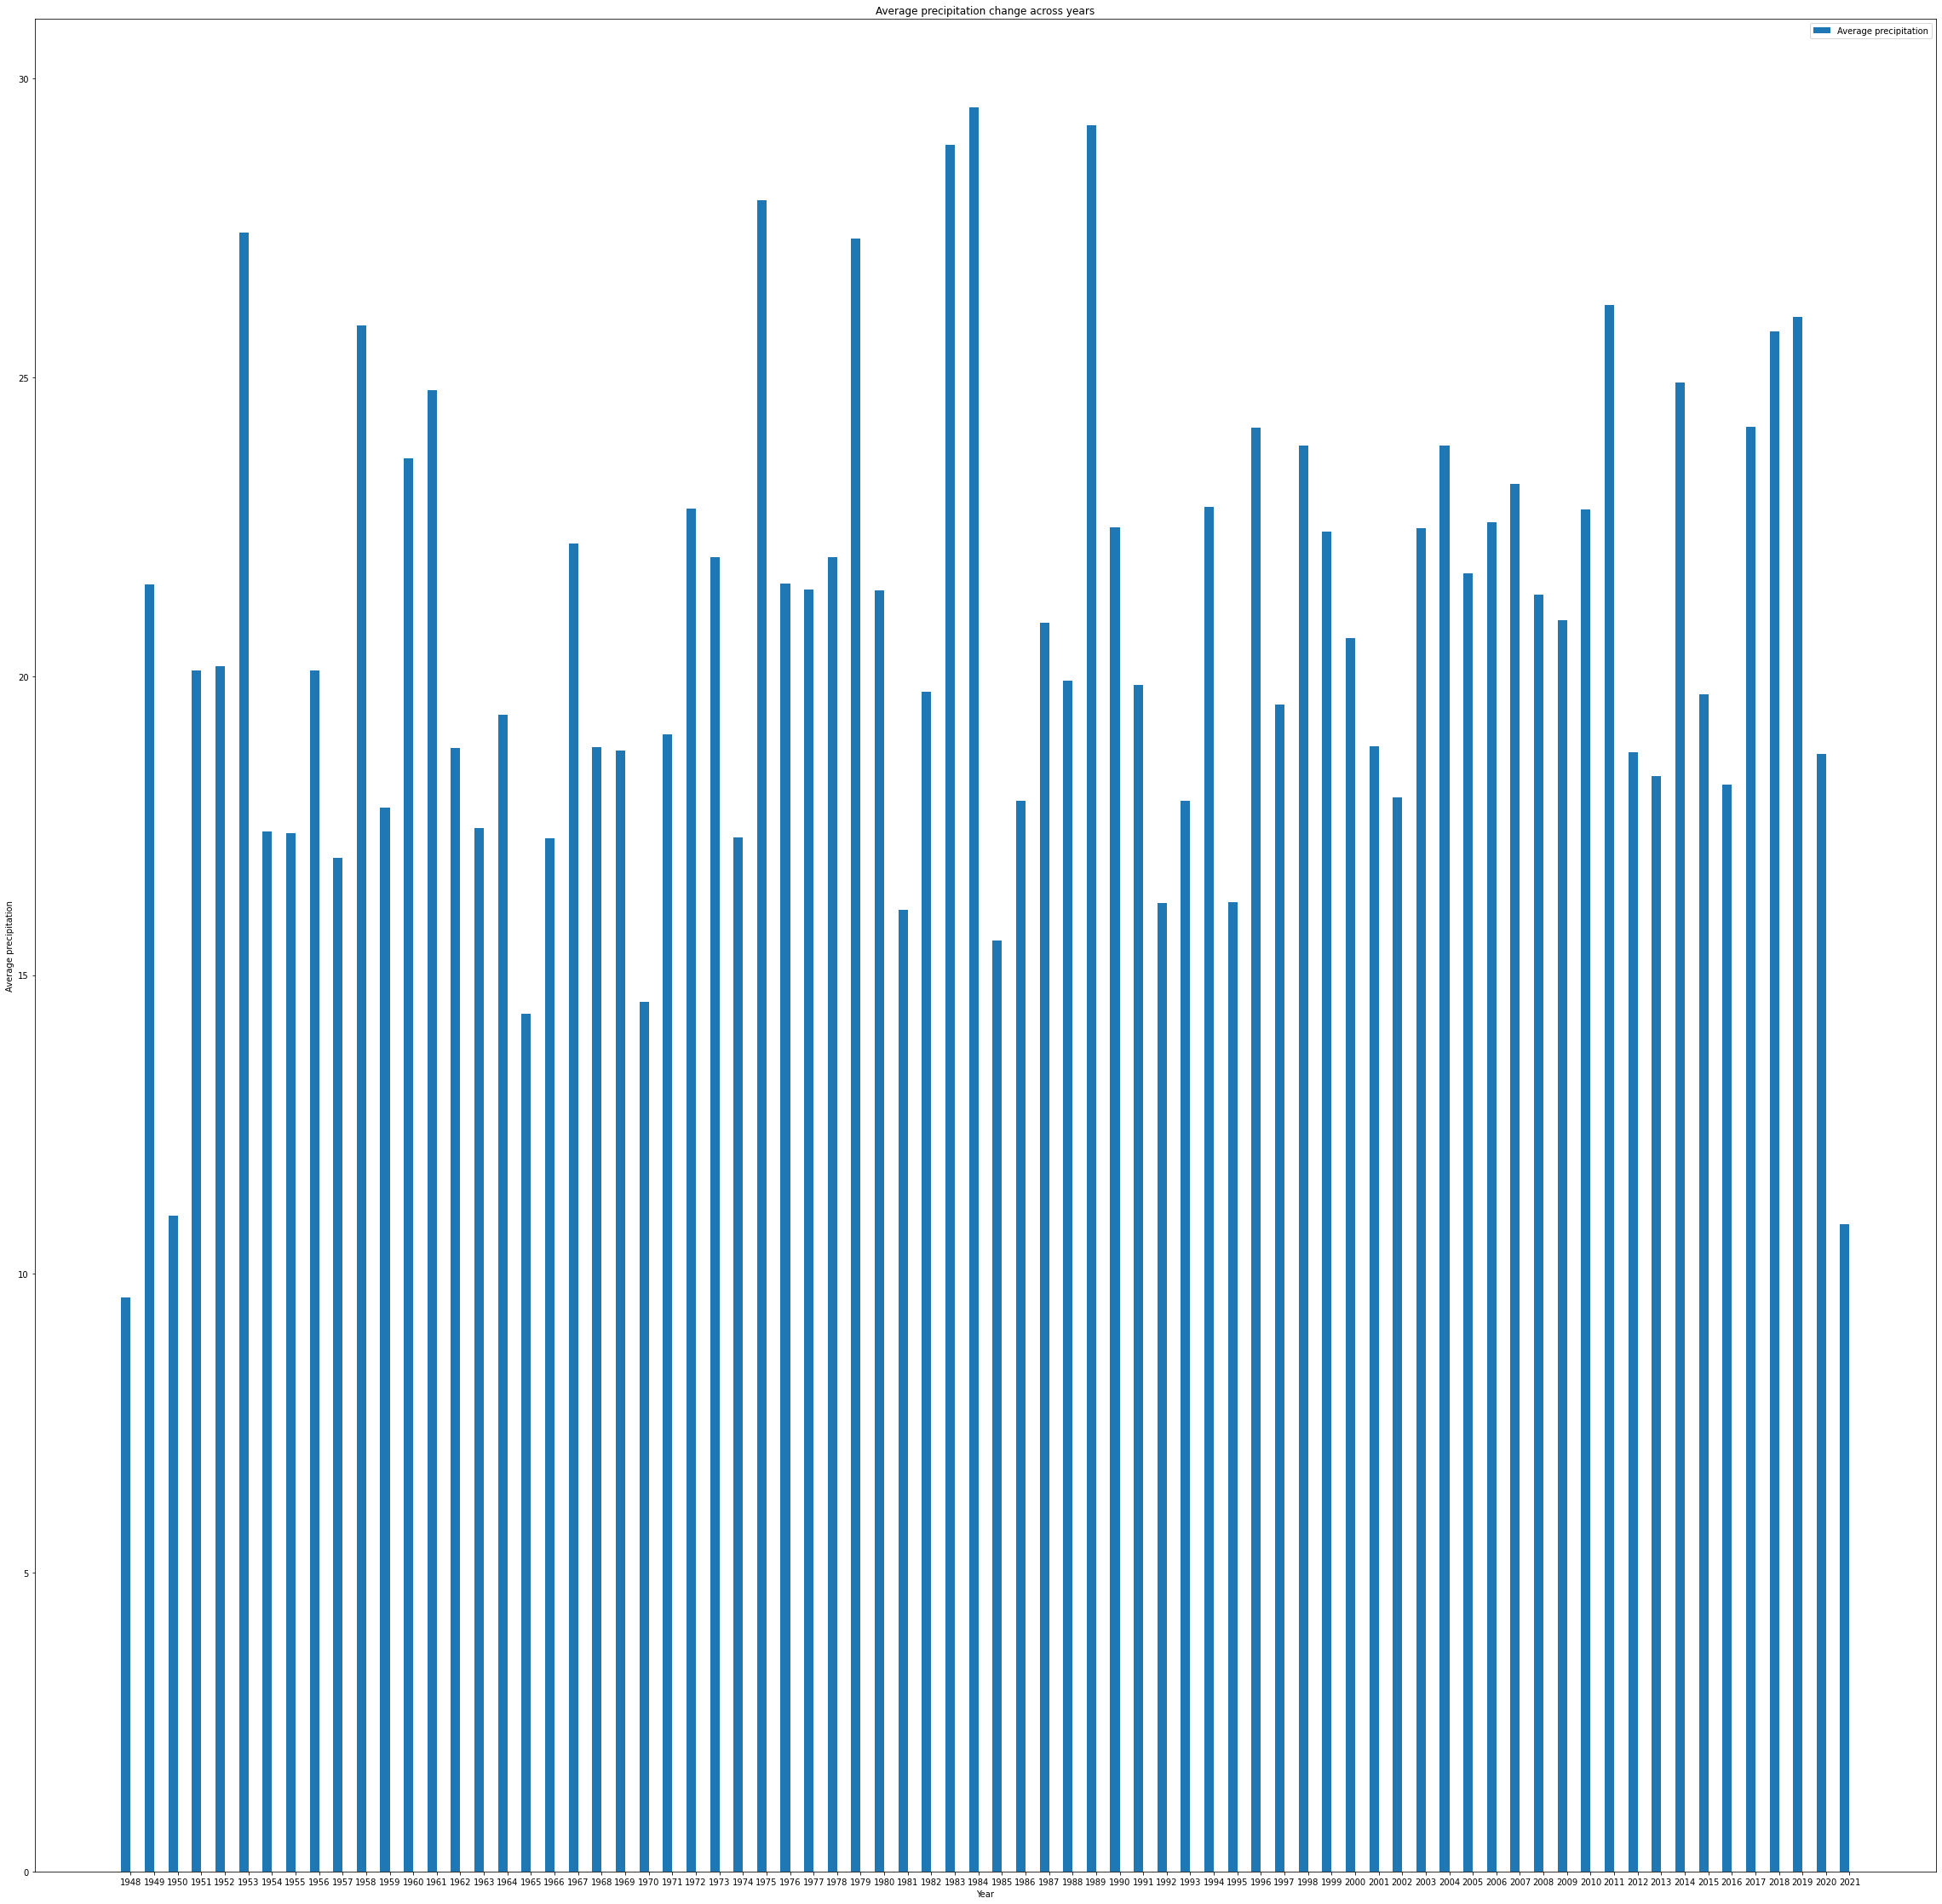

In [449]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(40,40))
plt.bar(Year_Axis-0.2,AvgPer,0.4,label='Average precipitation')
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average precipitation')
plt.title('Average precipitation change across years')
plt.legend()
plt.show()

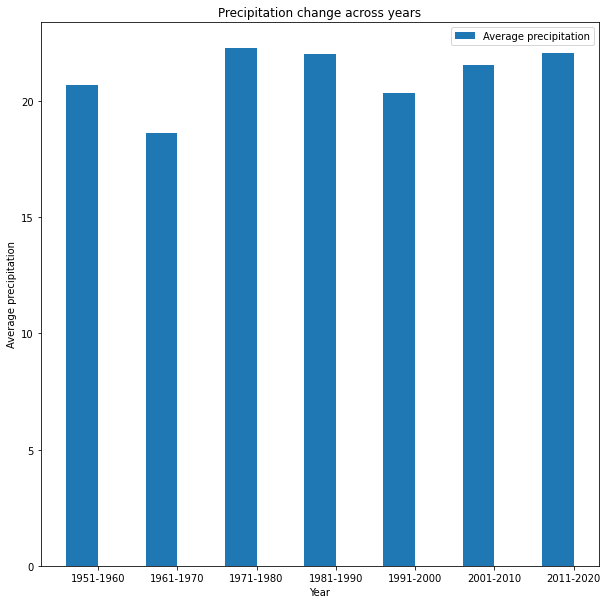

In [450]:
New_AvgPer = []

New_Year = ['1951-1960','1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']
YearSum = 0.0
YearCount = 0
for i in AvgPer[3:-1]:
  if(YearCount >= 10):
    
    New_AvgPer.append(YearSum/10.0)
    YearCount=0
    YearSum=0.0
    YearSum+=i
    YearCount+=1
  else:
    YearCount+=1
    YearSum+=i
New_AvgPer.append(YearSum/YearCount)

Year_Axis = np.arange(len(New_Year))
plt.figure(figsize=(10,10))
plt.bar(Year_Axis-0.2,New_AvgPer,0.4,label='Average precipitation')
plt.xticks(Year_Axis,New_Year)
plt.xlabel('Year')
plt.ylabel('Average precipitation')
plt.title('Precipitation change across years')
plt.legend()
plt.show()

In [451]:
New_AvgPer[-1]-New_AvgPer[0]

1.3850599072709855

Text(0.5, 1.0, 'Avergae precipitation change across years')

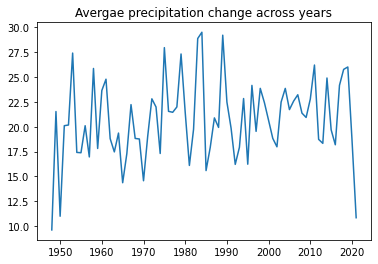

In [452]:
pd.Series(AvgPer,index=Year).plot()
plt.title('Avergae precipitation change across years')

In [453]:
Year = []
AvgPer = []
SumPer = 0.0
DayCount = 0.0
for i in Per_To_Aug.groupby(['date']).date:
  
  if not (str(Per_To_Aug['precipitation_normal'].loc[i[1].index[0]]) == 'nan' or str(Per_To_Aug['precipitation_normal'].loc[i[1].index[0]]) == 'T'):
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgPer.append(SumPer/DayCount)
        
      
      SumPer = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumPer+=float(Per_To_Aug['precipitation_normal'].loc[i[1].index[0]])
    DayCount+=1
AvgPer.append(SumPer/DayCount)

Text(0.5, 1.0, 'Avergae Normal precipitation change across years')

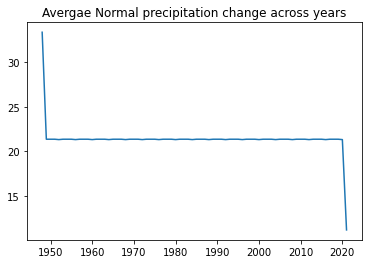

In [454]:
pd.Series(AvgPer,index=Year).plot()
plt.title('Avergae Normal precipitation change across years')

## Diffrence in Avarage Sum of Temp in the last 2 dicades 

In [455]:
temp_2000_2010 = temp[temp['date']>=datetime(2000,1,1) ]
temp_2000_2010 = temp_2000_2010[temp_2000_2010['date']<datetime(2010,1,1) ]

In [456]:
temp_2000_2010.date.min()

Timestamp('2000-01-01 00:00:00')

In [457]:
temp_2000_2010.date.max()

Timestamp('2009-12-31 00:00:00')

In [458]:
temp_2010_2020 = temp[temp['date']>=datetime(2010,1,1) ]
temp_2010_2020 = temp_2010_2020[temp_2010_2020['date']<datetime(2021,1,1) ]

In [459]:
temp_2000_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 18795 to 22447
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3653 non-null   datetime64[ns]
 1   min         3653 non-null   float64       
 2   max         3653 non-null   float64       
 3   normal_min  3653 non-null   float64       
 4   normal_max  3653 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.2 KB


In [460]:
temp_2010_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 22448 to 26465
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4018 non-null   datetime64[ns]
 1   min         4018 non-null   float64       
 2   max         4018 non-null   float64       
 3   normal_min  4018 non-null   float64       
 4   normal_max  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 188.3 KB


In [461]:
temp_2010_2020.date.min()

Timestamp('2010-01-01 00:00:00')

In [462]:
temp_2010_2020.date.max()

Timestamp('2020-12-31 00:00:00')

In [463]:
temp_2000_2010.isna().sum()

date          0
min           0
max           0
normal_min    0
normal_max    0
dtype: int64

In [464]:
temp_2010_2020.isna().sum()

date          0
min           0
max           0
normal_min    0
normal_max    0
dtype: int64

In [465]:
temp_2000_2010.duplicated().sum()

0

In [466]:
temp_2010_2020.duplicated().sum()

0

In [467]:
Year = ['2000-2010','2010-2020']
Avgs_min = [temp_2000_2010['min'].mean(),temp_2010_2020['min'].mean()]
Avgs_max = [temp_2000_2010['max'].mean(),temp_2010_2020['max'].mean()]

In [468]:
df_diff_temp = pd.DataFrame({'Year':Year,"Avgs_min":Avgs_min,"Avgs_max":Avgs_max})

<Figure size 7200x7200 with 0 Axes>

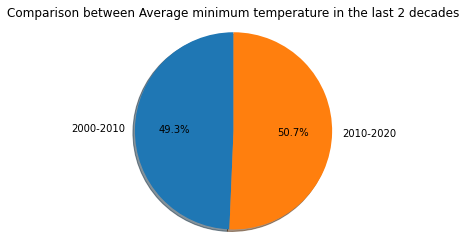

<Figure size 7200x7200 with 0 Axes>

In [469]:
plt.pie(Avgs_min,labels=Year,startangle=90,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Comparison between Average minimum temperature in the last 2 decades')
plt.figure(figsize=(100,100))

In [470]:
Avgs_min

[47.13742129756365, 48.41363862618218]

No handles with labels found to put in legend.


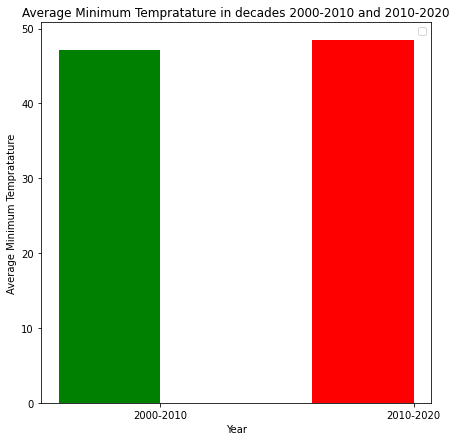

In [471]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(7,7))
plt.bar(Year_Axis-0.2,Avgs_min,0.4,color=['green','red'])
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Minimum Tempratature')
plt.title('Average Minimum Tempratature in decades 2000-2010 and 2010-2020')
plt.legend()
plt.show()

In [472]:
Avgs_max

[61.544757733369835, 62.931309109009455]

In [473]:
print('Diffrence minimum temp:',Avgs_min[-1]-Avgs_min[0])
print('Diffrence maximum temp:',Avgs_max[-1]-Avgs_max[0])

Diffrence minimum temp: 1.2762173286185288
Diffrence maximum temp: 1.3865513756396197


No handles with labels found to put in legend.


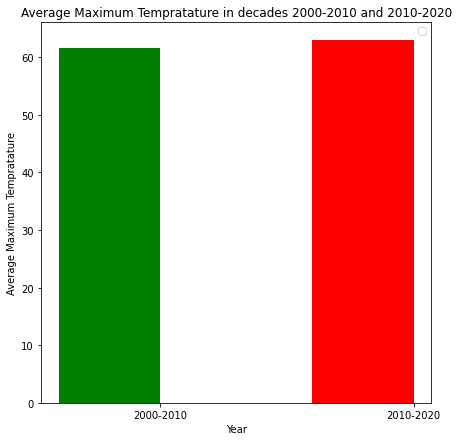

In [474]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(7,7))
plt.bar(Year_Axis-0.2,Avgs_max,0.4,color=['green','red'])
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Maximum Tempratature')
plt.title('Average Maximum Tempratature in decades 2000-2010 and 2010-2020')
plt.legend()
plt.show()

<Figure size 7200x7200 with 0 Axes>

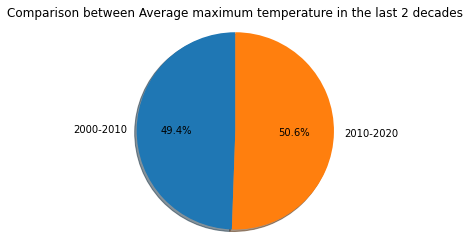

<Figure size 7200x7200 with 0 Axes>

In [475]:
plt.pie(Avgs_max,labels=Year,startangle=90,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Comparison between Average maximum temperature in the last 2 decades')
plt.figure(figsize=(100,100))

## Diffrence in Avarage Sum of precipitation in the last 2 dicades

In [476]:
Per_2000_2010 = Per[Per['date']>=datetime(2000,1,1) ]
Per_2000_2010 = Per_2000_2010[Per_2000_2010['date']<datetime(2010,1,1) ]
Per_2010_2020 = Per[Per['date']>=datetime(2010,1,1) ]
Per_2010_2020 = Per_2010_2020[Per_2010_2020['date']<datetime(2021,1,1) ]

In [477]:
Year = ['2000-2010','2010-2020']

In [478]:
Avgs_Per = []
SumPer = 0.0
DayCount = 0.0
for i in Per_2000_2010.precipitation:
 
  if not (i == 'T'):   
    SumPer+=float(i)
    DayCount+=1
Avgs_Per.append(SumPer/DayCount)

In [479]:
Avgs_Per

[21.35961601755345]

In [480]:
SumPer = 0.0
DayCount = 0.0
for i in Per_2010_2020.precipitation:
 
  if not (i == 'T'):   
    SumPer+=float(i)
    DayCount+=1
Avgs_Per.append(SumPer/DayCount)

In [481]:
Avgs_Per[-1]-Avgs_Per[0]

0.7777817890268466

No handles with labels found to put in legend.


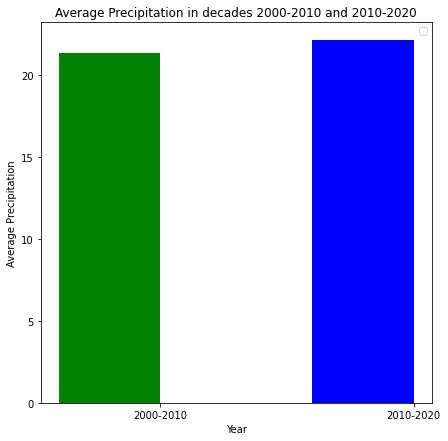

In [482]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(7,7))
plt.bar(Year_Axis-0.2,Avgs_Per,0.4,color=['green','blue'])
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation in decades 2000-2010 and 2010-2020')
plt.legend()
plt.show()

<Figure size 7200x7200 with 0 Axes>

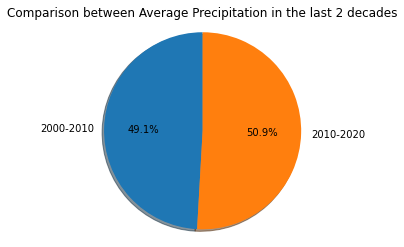

<Figure size 7200x7200 with 0 Axes>

In [483]:
plt.pie(Avgs_Per,labels=Year,startangle=90,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Comparison between Average Precipitation in the last 2 decades')
plt.savefig('two')
plt.figure(figsize=(100,100))


## Future Prediction

### Temprature

In [484]:
temp_2021_2025 = temp[temp['date']>datetime(2021,12,31)]

In [485]:
temp_2021_2025.date.min()

Timestamp('2022-01-01 00:00:00')

In [486]:
temp_2021_2025.date.max()

Timestamp('2025-12-31 00:00:00')

In [487]:
temp_2021_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 26831 to 28291
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1461 non-null   datetime64[ns]
 1   min         0 non-null      float64       
 2   max         0 non-null      float64       
 3   normal_min  1461 non-null   float64       
 4   normal_max  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 68.5 KB


In [488]:
Year = []
AvgMinimum = []
AvgMax = []
SumMin = 0.0
SumMax = 0.0
DayCount = 0.0
for i in temp_2021_2025.groupby(['date']).date:
  
  if not str(temp_2021_2025['normal_min'].loc[i[1].index[0]]) == 'nan':
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgMinimum.append(SumMin/DayCount)
        AvgMax.append(SumMax/DayCount)
      
      SumMin = 0
      SumMax = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumMin+=temp_2021_2025['normal_min'].loc[i[1].index[0]]
    SumMax+=temp_2021_2025['normal_max'].loc[i[1].index[0]]
    DayCount+=1
AvgMinimum.append(SumMin/DayCount)
AvgMax.append(SumMax/DayCount)

In [489]:
Year

[2022, 2023, 2024, 2025]

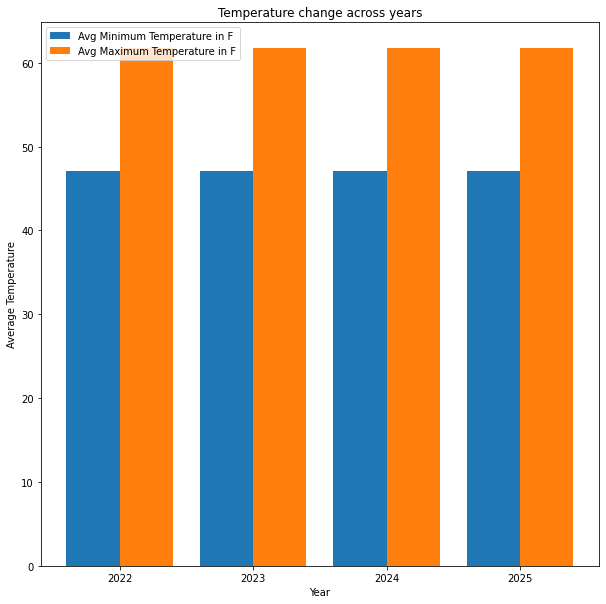

In [490]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(10,10))
plt.bar(Year_Axis-0.2,AvgMinimum,0.4,label='Avg Minimum Temperature in F')
plt.bar(Year_Axis+0.2,AvgMax,0.4,label='Avg Maximum Temperature in F')
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature change across years')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Average Normal Minimum Temprature across years 2021 to 2025')

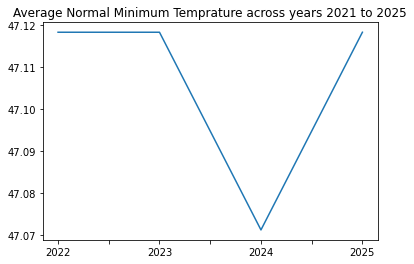

In [491]:
pd.Series(AvgMinimum,index=[str(i) for i in Year]).plot()
plt.title('Average Normal Minimum Temprature across years 2021 to 2025')

Text(0.5, 1.0, 'Average Normal Maximum Temprature across years 2021 to 2025')

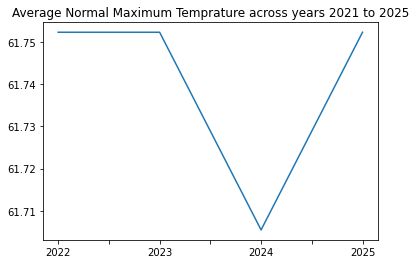

In [492]:
pd.Series(AvgMax,index=[str(i) for i in Year]).plot()
plt.title('Average Normal Maximum Temprature across years 2021 to 2025')

In [493]:
AvgMinimum

[47.11835616438357, 47.11835616438357, 47.07131147540984, 47.11835616438357]

In [494]:
AvgMax

[61.75232876712328, 61.75232876712328, 61.70546448087431, 61.75232876712328]

### Precipitation

In [495]:
Pre_2021_2025 = Per[Per['date']>datetime(2021,12,31)]

In [496]:
Pre_2021_2025

,date,precipitation,precipitation_normal
26831,2022-01-01,NaN,0.10
26832,2022-01-02,NaN,0.21
26833,2022-01-03,NaN,0.31
26834,2022-01-04,NaN,0.43
26835,2022-01-05,NaN,0.54
...,...,...,...
28287,2025-12-27,NaN,42.84
28288,2025-12-28,NaN,42.95
28289,2025-12-29,NaN,43.07
28290,2025-12-30,NaN,43.18


In [497]:
Pre_2021_2025.precipitation_normal.isna().sum()

0

In [498]:
Pre_Nom = []
for i in Pre_2021_2025['precipitation_normal'].values:
  Pre_Nom.append(float(i))


In [499]:
Pre_Nom

[0.1,
 0.21,
 0.31,
 0.43,
 0.54,
 0.65,
 0.76,
 0.86,
 0.97,
 1.08,
 1.19,
 1.3,
 1.41,
 1.52,
 1.63,
 1.73,
 1.84,
 1.94,
 2.03,
 2.13,
 2.24,
 2.34,
 2.44,
 2.54,
 2.64,
 2.74,
 2.83,
 2.93,
 3.03,
 3.13,
 3.23,
 3.33,
 3.43,
 3.52,
 3.62,
 3.71,
 3.81,
 3.9,
 3.98,
 4.07,
 4.16,
 4.25,
 4.35,
 4.44,
 4.53,
 4.63,
 4.73,
 4.84,
 4.94,
 5.04,
 5.14,
 5.25,
 5.35,
 5.45,
 5.56,
 5.67,
 5.77,
 5.88,
 5.99,
 6.11,
 6.23,
 6.35,
 6.47,
 6.59,
 6.71,
 6.84,
 6.96,
 7.09,
 7.22,
 7.34,
 7.46,
 7.58,
 7.71,
 7.84,
 7.98,
 8.11,
 8.24,
 8.38,
 8.51,
 8.65,
 8.78,
 8.91,
 9.03,
 9.16,
 9.29,
 9.42,
 9.54,
 9.67,
 9.8,
 9.93,
 10.05,
 10.17,
 10.29,
 10.41,
 10.52,
 10.63,
 10.74,
 10.86,
 10.99,
 11.11,
 11.23,
 11.36,
 11.47,
 11.59,
 11.7,
 11.81,
 11.93,
 12.04,
 12.16,
 12.28,
 12.4,
 12.52,
 12.64,
 12.76,
 12.88,
 13.0,
 13.12,
 13.24,
 13.36,
 13.48,
 13.59,
 13.7,
 13.82,
 13.94,
 14.06,
 14.18,
 14.3,
 14.41,
 14.53,
 14.64,
 14.75,
 14.86,
 14.97,
 15.09,
 15.2,
 15.3,
 15.42,
 15.5

In [500]:
Pre_2021_2025 = pd.DataFrame({'date':Pre_2021_2025.date,'precipitation_normal':Pre_Nom})

In [501]:
Pre_2021_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 26831 to 28291
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1461 non-null   datetime64[ns]
 1   precipitation_normal  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [502]:
Year = []
AvgPer = []
SumPer = 0.0
DayCount = 0.0
for i in Pre_2021_2025.groupby(['date']).date:
  
  if not (str(Pre_2021_2025['precipitation_normal'].loc[i[1].index[0]]) == 'nan' or str(Pre_2021_2025['precipitation_normal'].loc[i[1].index[0]]) == 'T'):
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgPer.append(SumPer/DayCount)
        
      
      SumPer = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumPer+=float(Pre_2021_2025['precipitation_normal'].loc[i[1].index[0]])
    DayCount+=1
AvgPer.append(SumPer/DayCount)

No handles with labels found to put in legend.


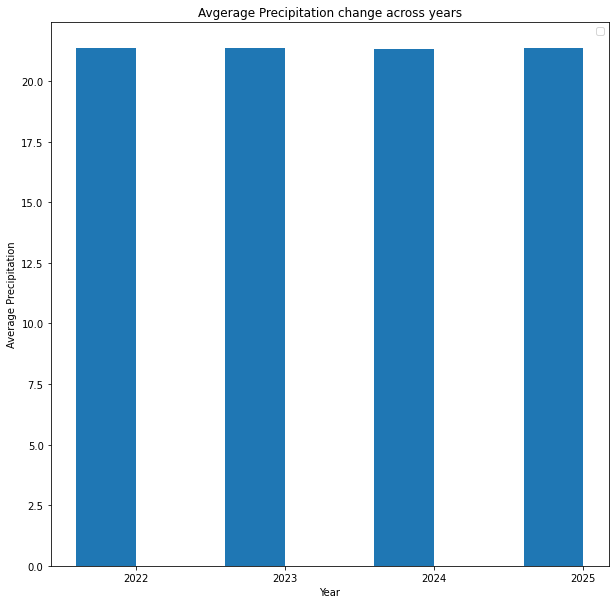

In [503]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(10,10))
plt.bar(Year_Axis-0.2,AvgPer,0.4)
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Avgerage Precipitation change across years')
plt.legend()
plt.show()

In [504]:
AvgPer

[21.353123287671238, 21.353123287671238, 21.31114754098361, 21.353123287671238]

Text(0.5, 1.0, 'Average Normal Precipitation Across years')

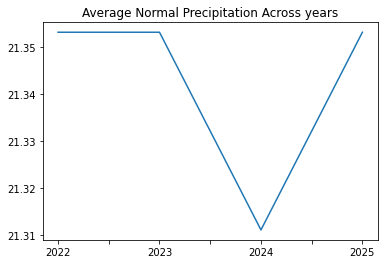

In [505]:
pd.Series(AvgPer,index=[str(i) for i in Year]).plot()
plt.title('Average Normal Precipitation Across years')